# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Weight vs height dataset

In [4]:
# load the dataset
X = np.loadtxt("data/linear_regression/weight.csv", delimiter=",")
y = np.loadtxt("data/linear_regression/height.csv", delimiter=",")

In [8]:
X.shape

(10000,)

In [5]:
# number of samples
len(X)

10000

In [9]:
# standardization of the dataset
mean_weight = np.mean(X)
std_weight = np.std(X)
mean_height = np.mean(y)
std_height = np.std(y)
X_norm = (X-mean_weight)/std_weight
y_norm = (y-mean_height)/std_height

In [16]:
# definition of the linear model
class LinearRegression:
    def __init__(self):
        # random initial guesses for the linear model
        self.slope_0 = np.random.normal(-1,1)
        self.intercept_0 = np.random.rand()

    def fit(self, X, y, learning_rate, epochs):
        self.slope = self.slope_0
        self.intercept = self.intercept_0
        self.loss_history = []

        N = X.shape[0]
        
        for _ in range(epochs):
            residual = self.predict(X) - y
            # derivatives of the cost with respect to the slope and the intercept
            self.dcostdm =  np.sum(residual @ X)*2/N
            self.dcostdc = np.sum(residual)*2/N         

            # gradient descent updates
            self.slope -= learning_rate*self.dcostdm 
            self.intercept -= learning_rate*self.dcostdc

            # compute the loss with the updated model
            training_prediction = self.predict(X)
            error = self.MSE(training_prediction, y)
            self.loss_history.append(error)
    
    def MSE(self, prediction, y):
        return np.linalg.norm(prediction - y)**2/prediction.shape[0]

    def predict(self, X):
        return self.slope*X + self.intercept

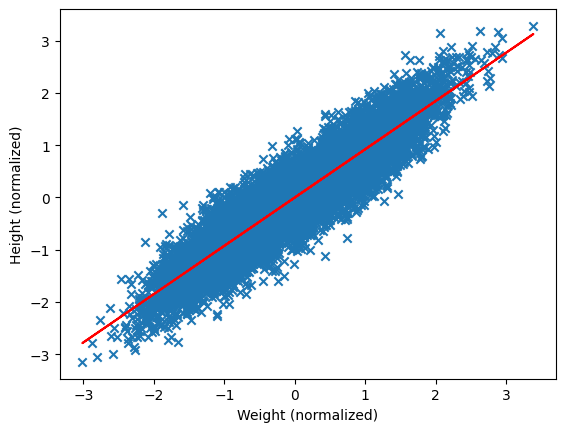

In [17]:
lr = LinearRegression()
lr.fit(X_norm, y_norm, 0.1, 50)

plt.scatter(X_norm, y_norm, marker="x")
pred = lr.predict(X_norm)
plt.plot(X_norm, pred,'r')
plt.xlabel("Weight (normalized)")
plt.ylabel("Height (normalized)")
plt.show()

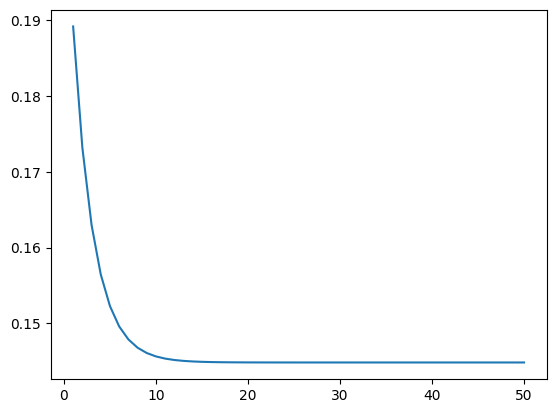

In [18]:
# learning curve
plt.plot(np.arange(1,len(lr.loss_history)+1,1),lr.loss_history)
plt.show()

In [19]:
# training set error
train_pred = lr.predict(X_norm)
lr.MSE(train_pred, X_norm)

np.float64(0.005661882234764815)

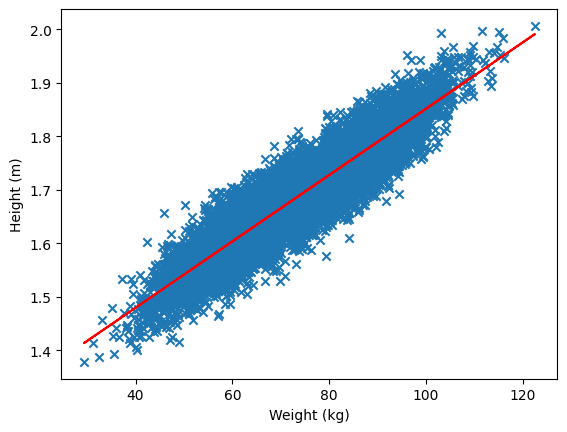

In [20]:
# compare the prediction of the model vs the non-normalized dataset
plt.scatter(X, y, marker="x")

# de-scale predictions using std and mean of the training set features
pred = std_height*lr.predict(X_norm)+mean_height

plt.plot(X, pred,'r')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.show()